<a href="https://colab.research.google.com/github/vivek09thakur/ML/blob/main/Colab/01_PizzaPricePrediction_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Pizza Price Prediction using Linear Regression**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
DATASET = "/content/pizza-price-dataset.csv"

In [60]:
pizzaData = pd.read_csv(DATASET)
pizzaData

,size,price,extra_cheese_charge,delivery_charge,additional_charge,MRP
0,100,150,10,10,0,170.0
1,110,160,15,10,0,185.0
2,120,170,20,10,0,200.0
3,130,180,25,10,0,215.0
4,140,190,30,10,0,230.0
5,150,200,35,10,0,245.0
6,160,210,40,10,0,260.0
7,170,220,45,10,0,275.0
8,180,230,50,10,0,290.0
9,190,240,55,10,0,305.0


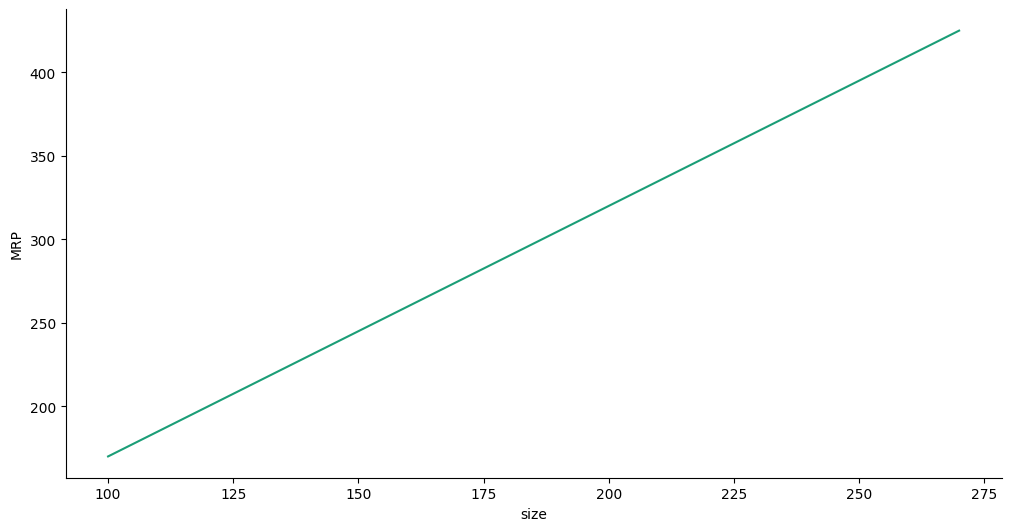

In [63]:
# @title size vs MRP

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['size']
  ys = series['MRP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = pizzaData.sort_values('size', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('size')
_ = plt.ylabel('MRP')

> This is what our dataset looks like, and you can see there is a missing value for MRP 18th row

**TASK : Our Task is to predict what will be the MRP for a pizza of size 280cm sq**

**PREPARING TRAIN DATA & TEST DATA**

In [64]:
train_X, train_Y = np.array(pizzaData[['size']][0:17]),np.array(pizzaData[['MRP']][0:17])

In [65]:
test_X,test_Y = np.array(pizzaData[['size']][9:10]),np.array(pizzaData[['MRP']][9:10])

In [66]:
print("Train X = ", train_X, "Type Of Train X = ", type(train_X))
print("\nTrain Y = ", train_Y, "Type Of Train Y = ", type(train_Y))

Train X =  [[100]
 [110]
 [120]
 [130]
 [140]
 [150]
 [160]
 [170]
 [180]
 [190]
 [200]
 [210]
 [220]
 [230]
 [240]
 [250]
 [260]] Type Of Train X =  <class 'numpy.ndarray'>

Train Y =  [[170.]
 [185.]
 [200.]
 [215.]
 [230.]
 [245.]
 [260.]
 [275.]
 [290.]
 [305.]
 [320.]
 [335.]
 [350.]
 [365.]
 [380.]
 [395.]
 [410.]] Type Of Train Y =  <class 'numpy.ndarray'>


### **LINEAR REGRESSION MODEL**

 **BUILDING THE MODEL**

In [68]:
model = LinearRegression()
model.fit(train_X,train_Y) # TRAINING THE MODEL

LinearRegression()

**TESTING THE MODEL**

In [69]:
print("Test X = ", test_X, "Type Of Test X = ", type(test_X))
print("\nTest Y = ", test_Y, "Type Of Test Y = ", type(test_Y))

Test X =  [[190]] Type Of Test X =  <class 'numpy.ndarray'>

Test Y =  [[305.]] Type Of Test Y =  <class 'numpy.ndarray'>


**In Machine Learning** : A model is said to be learned from its training data if the predicted output is accurate and correct.

> Here we have taken test data from our original dataset because we already know what the output will be. Hence we can see how much our model is accurate.

**MAKING PREDICTION**

In [70]:
predict_Y = model.predict(test_X)
predict_Y

array([[305.]])

> As you can see our model predicted the value 305 for test data which is exact same as our test Y. Hence we can say that our ML MODEL learned from its previous data.

# **FINAL GOAL**
> Now we can find the missing price value for a **Pizza of size 280cm sq** from our dataset. In short we are going to make **prediction on unseen data**

In [71]:
newData =  np.array(pizzaData[['size']][18:]) # selecting the last row
newData # Piza of size 280cm

array([[280]])

In [72]:
predicted_price = model.predict(newData)
predicted_price

array([[440.]])

In [73]:
print("Price for a pizza of size ",newData[0][0],"cm sq = ",predicted_price[0][0])

Price for a pizza of size  280 cm sq =  440.0


## **RESULT**

In [74]:
pizzaData['MRP'][18:] = predicted_price[0][0]
pizzaData

<ipython-input-74-8a46ece88a6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pizzaData['MRP'][18:] = predicted_price[0][0]


,size,price,extra_cheese_charge,delivery_charge,additional_charge,MRP
0,100,150,10,10,0,170.0
1,110,160,15,10,0,185.0
2,120,170,20,10,0,200.0
3,130,180,25,10,0,215.0
4,140,190,30,10,0,230.0
5,150,200,35,10,0,245.0
6,160,210,40,10,0,260.0
7,170,220,45,10,0,275.0
8,180,230,50,10,0,290.0
9,190,240,55,10,0,305.0


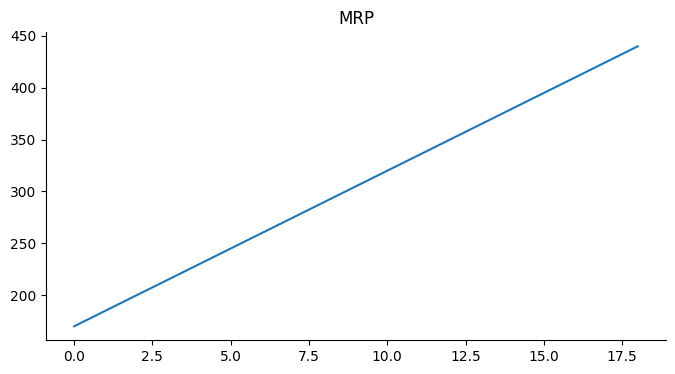

In [75]:
# @title MRP

from matplotlib import pyplot as plt
pizzaData['MRP'].plot(kind='line', figsize=(8, 4), title='MRP')
plt.gca().spines[['top', 'right']].set_visible(False)